# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# I. Problem Statement 

Promotions are very important approach to attract new customers and keep old customers loyal to the brand. It's a win-to-win situation for both the customer and the company. The customer gets the benifit of getting a discount or someting for free, which lets the customer be bounded more to the brand, and always tried new merchants. 

However, the idea of promotions will not be effective if it wasn't accompanied by educated business decisions. The company **must** know what kinds of promotions are applicable for the all of its customer base's demographics. As promotions are good to keep customers loyal, it's also a good tool to attract new customer base. The latter is very hard to achieve without educated and wise business decisions. 

The goal of this project is to analyze the dataset of Starbucks for simulated customer behaviour. Then ML models will be used to create and sythesize prediction models that classify whether the customers will just view the offer, or they will complete it and make use of it.  

# II. Metrics

The metrics are very important in any project, in order to chase and pursue the **real** goals, and modify the work based on them. The metirc I'll use for this project is the **accuracy**. I choose it because it suits the basic nature of this project, which is meaduring how **good** are the models when classifying whether offers will be just viewed or completed by the end customers. 

# III. Expolratory Data Analysis (EDA)

In this section of the notebook, I tackle the general analysis of the data; in order to get a better understanding, before going into the details of synthesing ML models. I'm gonna divide this section according to the dataframnes to be analyzed. Before getting into the juicy part, let's import all necessary libraries and dependencies, as well as the datasets. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import json
import datetime
import matplotlib.pyplot as plt 
import sys, importlib
import time
import ml_models_handler as ml 
import auxiliary_module as aux


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

## III.I. Portfolio Dataframe

Let's Examine the `portfolio` dataframe first. 

In [2]:
portfolio.head()

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [3]:
print("The portfolio dataframe contains {} rows and {} columns.".format(portfolio.shape[0], portfolio.shape[1]))

The portfolio dataframe contains 10 rows and 6 columns.


Let's inspect the NaNs contained in the dataframe. 

In [4]:
portfolio.isna().sum()

channels      0
difficulty    0
duration      0
id            0
offer_type    0
reward        0
dtype: int64

It seems that this dataframe doesn't have any NaNs. 

Let's clean up this dataframe before we proceed to the second dataframe. The steps to be taken are as follows: 
- Rename the `id` column to `offer_id`. 
- Change the unit of 'duration' column from days to hours.
- Rename 'duration' column to 'duration_h', to reflect the new nature of the column 
- Normalize 'difficulty' and 'reward' features using the MinMaxScaler.
- Create dummy variables from the 'channels' column. 
- Normalize the `difficulty` and `reward` columns. 
- Transform the `offer_id` column to a more readable id (i.e., numbers: 1,2, etc.)
- Replace `offer type` with corresponding interger values as follows: 
    - bogo == 1 
    - discount == 2 
    - informatiomnal == 3
    
The cell below takes care of everything. 



In [5]:
# uncomment this to use the function to process the dataframe, otherwise please proceed with the line that loads the 
# dataframe I used while copmosing this notebook from the pickled file 
# cleaned_portfolio_df = aux.clear_portfolio_df(portfolio)

# pickle the dataframe  
# cleaned_portfolio_df.to_pickle("data_frames/cleaned_portfolio_df.pkl")

# load the the model I saved while I was working on this notebook 
cleaned_portfolio_df = pd.read_pickle("data_frames/cleaned_portfolio_df.pkl")
cleaned_portfolio_df.head()

,difficulty,duration_h,offer_id,offer_type,reward,channel_email,channel_mobile,channel_social,channel_web
0,0.50,168,8,1,1.0,1,1,1,0
1,0.50,120,5,1,1.0,1,1,1,1
2,0.00,96,4,3,0.0,1,1,0,1
3,0.25,168,7,1,0.5,1,1,0,1
4,1.00,240,1,2,0.5,1,0,0,1


We're going to consider `cleaned_portfolio_df` dataframe when we'll refer to the `portfolio` dataframe from now on.Now, we finished the work on the `portfolio` dataframe, let's move on to explore `profile` dataframe.  

## III.II. Profile Dataframe

Let's examine the `profile` dataframe before doing any processing

In [6]:
profile.head()
# This will be used when processing the `transcript` dataframe 
old_profile = profile.copy()

In [7]:
print("The profile dataframe contains {} rows and {} columns.".format(profile.shape[0], profile.shape[1]))

The profile dataframe contains 17000 rows and 5 columns.


Let's examine the NaNs in the `profile` dataframe 

In [8]:
profile.isna().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

It seems that we have a **2175** missing values in both `gender` and `income` columns. 

Let's plot the ages of all customers 

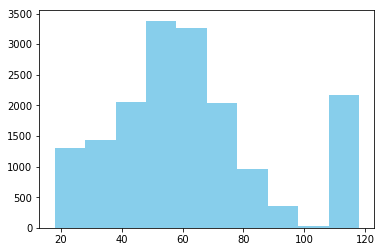

In [9]:
plt.hist(profile['age'], bins=10, color="skyblue");

Also, let's plot the distribution of genders among users in the `profile` dataframe. 

[8484, 6129, 212]


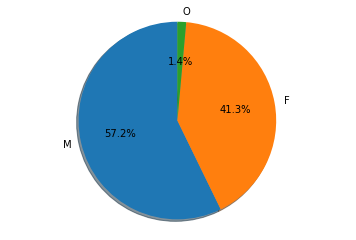

In [10]:
labels = ['M', 'F', 'O']
sizes = [profile['gender'].value_counts()[0], profile['gender'].value_counts()[1], profile['gender'].value_counts()[2]]
print(str(sizes))
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Let's examine the `income` column a bit closer.  

In [11]:
profile.income.describe()

count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64

Also, let's graph it. 

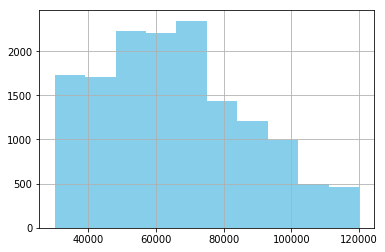

In [12]:
profile['income'].hist(color='skyblue');

It's time to process the `profile` dataframe. To do so, I'm going to divide this process into the following steps:
- Processing the `id` column. 
- Processing the `age` column.
- Processing the `income` column. 
- Processing the `gender` column. 
- Processing the `became_member_on` column. 

In [13]:
# uncomment this to use the function to process the dataframe, otherwise please proceed with the line that loads the 
# dataframe I used while copmosing this notebook from the pickled file 
# cleaned_profile_df = aux.clear_profile_df(profile)

# pickle the dataframe  
# cleaned_profile_df.to_pickle("data_frames/cleaned_profile_df.pkl")

# load the the model I saved while I was working on this notebook 
cleaned_profile_df = pd.read_pickle("data_frames/cleaned_profile_df.pkl")


cleaned_profile_df.head()


,gender,customer_id,age_group,income_range,membership_year,member_type
1,1,399,3,3,2017,2.0
3,1,7997,4,3,2017,2.0
5,2,15044,4,2,2018,1.0
8,2,3729,4,1,2018,1.0
12,2,3060,3,1,2017,1.0


In [14]:
cleaned_profile_df.shape

(14825, 6)

Let's drop any NaN

In [15]:
cleaned_profile_df.dropna(inplace=True)

We finished exploring and cleaning the `profile` dataframe. Let's process the last dataframe. 

## III.III. Transcript Dataframe

Let's take a closer look at the `transcript` dataframe 

In [16]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [17]:
print("The transcript dataframe has {} rows and {} cols .".format(transcript.shape[0], transcript.shape[1]))

The transcript dataframe has 306534 rows and 4 cols .


Let's check the duplicates in the transcript dataframe. 

In [18]:
transcript.columns.duplicated().sum()

0

Let's check the NaNs in the `transcript` dataframe.

In [19]:
# check the NaNs values in the transcript dataframe 
transcript.isna().sum()

event     0
person    0
time      0
value     0
dtype: int64

Let's plot the distribution of the `offers` types.

[138953, 76277, 57725]


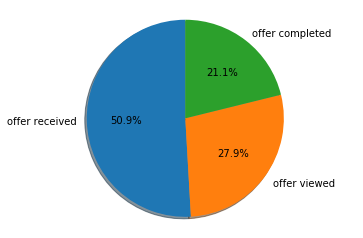

In [20]:
# plot the event column 
labels = ['offer received', 'offer viewed', 'offer completed']
sizes = [transcript['event'].value_counts()[0], transcript['event'].value_counts()[1], transcript['event'].value_counts()[2]]
print(str(sizes))
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In order to process the dataframe, I'll follow the below steps: 
- Preprocess `person` column 
- Rename the `time` column 
- Preprocess the `value` column
- Preprocess the `event` column 
- Preprocess the `offer_id` column 

Also, since I'm intersted in only the offers, I'm going to remove the all `transactions`, since it won't help the purpose of the study. Also, since I'm interseted in how customers react to offers sent, so I'm going to exclude all `offer_recieved`. 

In [21]:
# uncomment this to use the function to process the dataframe, otherwise please proceed with the line that loads the 
# dataframe I used while copmosing this notebook from the pickled file 
# cleaned_transcript_df = aux.clear_transcript_df(transcript, old_profile, cleaned_portfolio_df)


# pickle the dataframe  
# cleaned_transcript_df.to_pickle("data_frames/cleaned_transcript_df.pkl")

# load the the model I saved while I was working on this notebook 
cleaned_transcript_df = pd.read_pickle("data_frames/cleaned_transcript_df.pkl")


cleaned_transcript_df.head()



,event,customer_id,time_h,offer_id,amount,reward
12650,2,3729,0,9,0,0
12651,2,13995,0,6,0,0
12652,2,1052,0,5,0,0
12653,2,170,0,8,0,0
12655,2,12744,0,6,0,0


It's time to blend and merge all three dataframes 

In [22]:
# uncomment this to use the function to process the dataframe, otherwise please proceed with the line that loads the 
# dataframe I used while copmosing this notebook from the pickled file 

# merge 'clean_transcript' dataset with 'clean_portfolio' on 'offer_id'
# final_df = cleaned_transcript_df.merge(cleaned_portfolio_df, how='left',on='offer_id')

# join 'master_df' dataset with 'clean_profile' on 'customer_id'
# final_df = final_df.merge(cleaned_profile_df, how ='left', on = 'customer_id')

# Pickle the dataframe 
# final_df.to_pickle("data_frames/final_df.pkl")

final_df = pd.read_pickle("data_frames/final_df.pkl")

final_df.head()

,event,customer_id,time_h,offer_id,amount,reward_x,difficulty,duration_h,offer_type,reward_y,channel_email,channel_mobile,channel_social,channel_web,gender,age_group,income_range,membership_year,member_type
0,2,3729,0,9,0,0,0.25,120,1,0.5,1,1,1,1,2.0,4.0,1.0,2018.0,1.0
1,2,13995,0,6,0,0,0.00,72,3,0.0,1,1,1,0,3.0,3.0,1.0,2017.0,2.0
2,2,1052,0,5,0,0,0.50,120,1,1.0,1,1,1,1,1.0,4.0,1.0,2016.0,2.0
3,2,170,0,8,0,0,0.50,168,1,1.0,1,1,1,0,1.0,1.0,1.0,2016.0,2.0
4,2,12744,0,6,0,0,0.00,72,3,0.0,1,1,1,0,2.0,3.0,1.0,2014.0,3.0


Let's do a check on the `final_df` regarding NaNs. 

In [23]:
final_df.isna().sum()

event                 0
customer_id           0
time_h                0
offer_id              0
amount                0
reward_x              0
difficulty            0
duration_h            0
offer_type            0
reward_y              0
channel_email         0
channel_mobile        0
channel_social        0
channel_web           0
gender             9587
age_group          9587
income_range       9587
membership_year    9587
member_type        9587
dtype: int64

It seems that we have some NaNs. Let's remove them. 

In [24]:
final_df.dropna(how='any', axis=0, inplace=True)

In [25]:
final_df.isna().sum()

event              0
customer_id        0
time_h             0
offer_id           0
amount             0
reward_x           0
difficulty         0
duration_h         0
offer_type         0
reward_y           0
channel_email      0
channel_mobile     0
channel_social     0
channel_web        0
gender             0
age_group          0
income_range       0
membership_year    0
member_type        0
dtype: int64

Now, it's time to answer some questions as follows: 
- What are the Common Offers among each Age Group? 
- How many Customers Joined the Starbucks Promotional Program ? 
- Which Promotion Type is Preferred to Genders ? 

#### What are the common offers among each age group? 

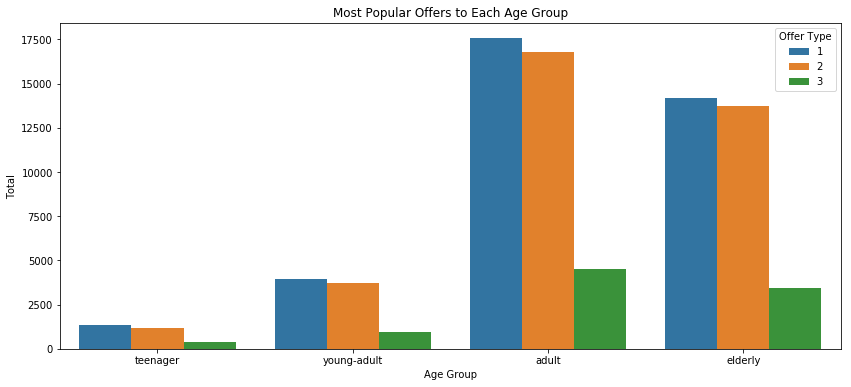

In [26]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x="age_group", hue="offer_type", data=final_df)
plt.title('Most Popular Offers to Each Age Group')
plt.ylabel('Total')
plt.xlabel('Age Group')
xlabels = ['teenager','young-adult','adult','elderly']
g.set_xticklabels(xlabels)
plt.xticks(rotation = 0)
plt.legend(title='Offer Type')
plt.show();

When it comes to the most common promotion among all the age group, we can observe that it's the BOGO promotions. We see that the numbers for teenager and yound-adult are very small. This may give an indication about which age group to target. 

#### How many Customers Joined the Starbucks Promotional Program ?

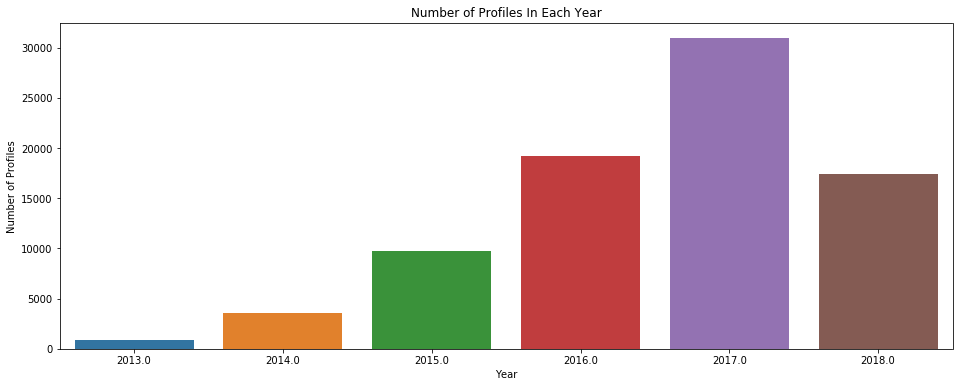

In [27]:
plt.figure(figsize=(16, 6))
sns.countplot(final_df['membership_year'])
plt.title('Number of Profiles In Each Year')
plt.ylabel('Number of Profiles')
plt.xlabel('Year')
plt.xticks()
plt.show();

We can see that the start of the program wasn't that promising. However, it kept increasing until it reached its best numbers in 2017. 

#### Which Promotion Type when it Comes to Gender Type ? 

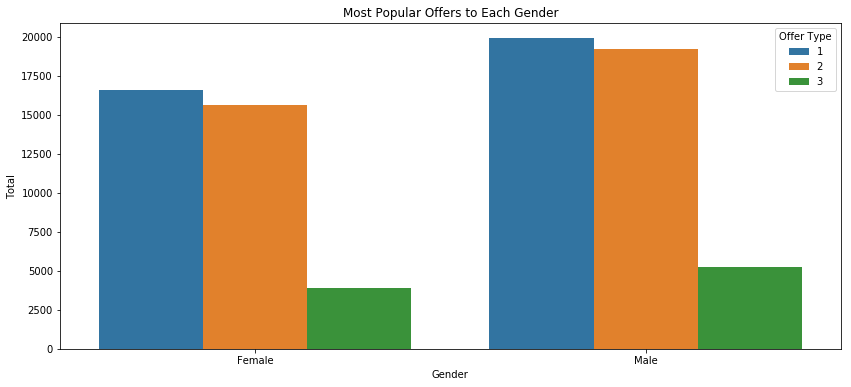

In [28]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x='gender', hue="offer_type", data= final_df[final_df["gender"] != 3])
plt.title('Most Popular Offers to Each Gender')
plt.ylabel('Total')
plt.xlabel('Gender')
xlabels = ['Female', 'Male']
g.set_xticklabels(xlabels)
plt.legend(title='Offer Type')
plt.show();

We can see that the most preferred type of the promotions is the BOGO. 

# IV. Data Modeling

In this section, we build the ML models. This section is divided as follows: 
- Create the `training sets` and `testing sets`, in order to be inputted to the ML models.
- Build the actual ML models. I chose the following algorithms: 
    - Support Vector Machine (SVM)
    - Logistic Regression
    - Artificial Neural Networks (ANN) 

## IV.I. Creating the `Training Sets` and `Testing Sets`

It's time to use ML models to predict whether the offers where completed or just viewed by the customer. 
First, we need to split the `final_df` to **features** (i.e., to be used when building ML models) and **target** (i.e., the variable we're trying to predict)

| Features    |
|:---:|
| time_h    |
| offer_id |
| amount |
| reward_x (to be renamed later to 'reward_obtained' |
| difficulty |
| duration_h |
| offer_type |
| age_group |
| income_range |
| member_type |



| Target|
|:---:|
| offer_viewed |
| offer_recieved |

Rename `reward_x` column to `reward_obtained`

In [29]:
final_df.rename(columns ={'reward_x':'reward_obtained'}, inplace = True)

Now, Let's divide the `final_df` to an `X` (i.e., represents the features) and `Y` (i.e., represents the targets)

In [30]:
X = final_df[['time_h','offer_id','amount','reward_obtained','difficulty','duration_h','offer_type','gender','age_group','income_range', 'member_type']]
Y = final_df['event']

Let's take a final look at both `X` and `Y` 

In [31]:
X.head()

,time_h,offer_id,amount,reward_obtained,difficulty,duration_h,offer_type,gender,age_group,income_range,member_type
0,0,9,0,0,0.25,120,1,2.0,4.0,1.0,1.0
1,0,6,0,0,0.00,72,3,3.0,3.0,1.0,2.0
2,0,5,0,0,0.50,120,1,1.0,4.0,1.0,2.0
3,0,8,0,0,0.50,168,1,1.0,1.0,1.0,2.0
4,0,6,0,0,0.00,72,3,2.0,3.0,1.0,3.0


In [32]:
Y.head()

0    2
1    2
2    2
3    2
4    2
Name: event, dtype: int64

Now, let's create `training_sets` and `testing_sets`

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=40)

As mentioned in the `Metrics` section, I'm going to use the **accuracy** as the main metric. This is becuase the accuracy will be very helpful, when it comes to know whether the models are performing well or not. 

## IV.II. Building ML Models

In this section, I'm going to use the created `training` and `testing` sets in the previous subsection, in order to build the ML models. 

In [34]:
# this list holds the names of the models (to be plotted later on)
models_names =  ['SVM' , 'Logistic Regression' , 'Neural Network- old', 'Neural Network- new']

# this list holds the training accuracies for all 4 models 
models_training_accuracies = [] 

# this list holds the testing accuracies for all 4 models
models_testing_accuracies = [] 

# this list holds the building time for all 4 models 
models_build_time = [] 


### IV.II.I Support Vector Machine (SVM)

In [35]:
# start the counter 
start_time = time.perf_counter()

# call the function here 
svm = ml.svm_handler(X_train, y_train)

# end the timer after the function finishes the execution 
end_time = time.perf_counter()

# record the values to be modeled later on 
models_training_accuracies.append(round(svm.score(X_train, y_train)*100,2))
models_testing_accuracies.append(ml.predict_score(svm, X_test, y_test))

print(f'Accuracy of SVM classifier on training set: {models_training_accuracies[0]}%.')
print(f'Prediction Accuracy: {models_testing_accuracies[0]}%')

# record the build time  
models_build_time.append(round((end_time - start_time), 2))

print("The model took {} seconds in order to finish training.".format(models_build_time[0]))


Accuracy of SVM classifier on training set: 100.0%.
Prediction Accuracy: 100.0%
The model took 1.34 seconds in order to finish training.


### IV.II.II. Logistic Regression 

In [36]:
# importlib.reload(sys.modules['ml_models_handler'])

# start the counter 
start_time = time.perf_counter()

# call the function here 
logreg = ml.logistic_handler(X_train, y_train)

# end the timer after the function finishes the execution 
end_time = time.perf_counter()

# record the values to be modeled later on 
models_training_accuracies.append(round(logreg.score(X_train, y_train)*100,2))
models_testing_accuracies.append(ml.predict_score(logreg, X_test, y_test))

print(f'Accuracy of Logistic Regression classifier on training set: {models_training_accuracies[1]}%.')
print(f'Prediction Accuracy: {models_testing_accuracies[1]}%')

# record the build time  
models_build_time.append(round((end_time - start_time), 2))

print("The model took {} seconds in order to finish training.".format(models_build_time[1]))

Accuracy of Logistic Regression classifier on training set: 100.0%.
Prediction Accuracy: 100.0%
The model took 0.64 seconds in order to finish training.


#### IV.II.IIl. Artificial Neural Network (ANN) {UNOPTIMIZED}

In [37]:
importlib.reload(sys.modules['ml_models_handler'])

# start the timer 
start_time = time.perf_counter()

# call the function here 
unoptimized_neural_network = ml.neural_network_handler(X_train, y_train,'lbfgs', 1e-5, (1, 1), 1)

# end the timer after the function finishes the execution 
end_time = time.perf_counter()

# record the values to be modeled later on 
models_training_accuracies.append(round(unoptimized_neural_network.score(X_train, y_train)*100,2))
models_testing_accuracies.append(ml.predict_score(unoptimized_neural_network, X_test, y_test))

print(f'Accuracy of the Unoptimized Neural Network classifier on training set: {models_training_accuracies[2]}%.')
print(f'Prediction Accuracy: {models_testing_accuracies[2]}%')

# record the build time  
models_build_time.append(round((end_time - start_time), 2))

print("The model took {} seconds in order to finish training.".format(models_build_time[2]))

Accuracy of the Unoptimized Neural Network classifier on training set: 60.62%.
Prediction Accuracy: 60.4454%
The model took 0.06 seconds in order to finish training.


### IV.III. Model Refinements and Evaluation  

We can see that we both `SVM` with a `kernal` of type `linear` and `Logistic Regression` have done great performance. However, the `Neural Netowkr`'s performance is not as good as the prevuous models. I'll try in the next cell to optimize the neural network, by changing the number of `hidden layers` in the network

### IV.III.I Artificial Neural Network (ANN) {OPTIMIZED}

In [38]:
importlib.reload(sys.modules['ml_models_handler'])

start_time = time.perf_counter()

# call the function here 
unoptimized_neural_network = ml.neural_network_handler(X_train, y_train,'lbfgs', 1e-5, (7, 7), 1)
end_time = time.perf_counter()

# record the values to be modeled later on 
models_training_accuracies.append(round(unoptimized_neural_network.score(X_train, y_train)*100,2))
models_testing_accuracies.append(ml.predict_score(unoptimized_neural_network, X_test, y_test))

print(f'Accuracy of the Optimized Neural Network classifier on training set: {models_training_accuracies[3]}%.')
print(f'Prediction Accuracy: {models_testing_accuracies[3]}%')

# record the build time  
models_build_time.append(round((end_time - start_time), 2))

print("The model took {} seconds in order to finish training.".format(models_build_time[3]))

Accuracy of the Optimized Neural Network classifier on training set: 100.0%.
Prediction Accuracy: 100.0%
The model took 6.44 seconds in order to finish training.


It appears that the neural network has done a better job when using `(7,7)` as number of hidden neurons. 

Now, Let's plot the accuracy of all these models 

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


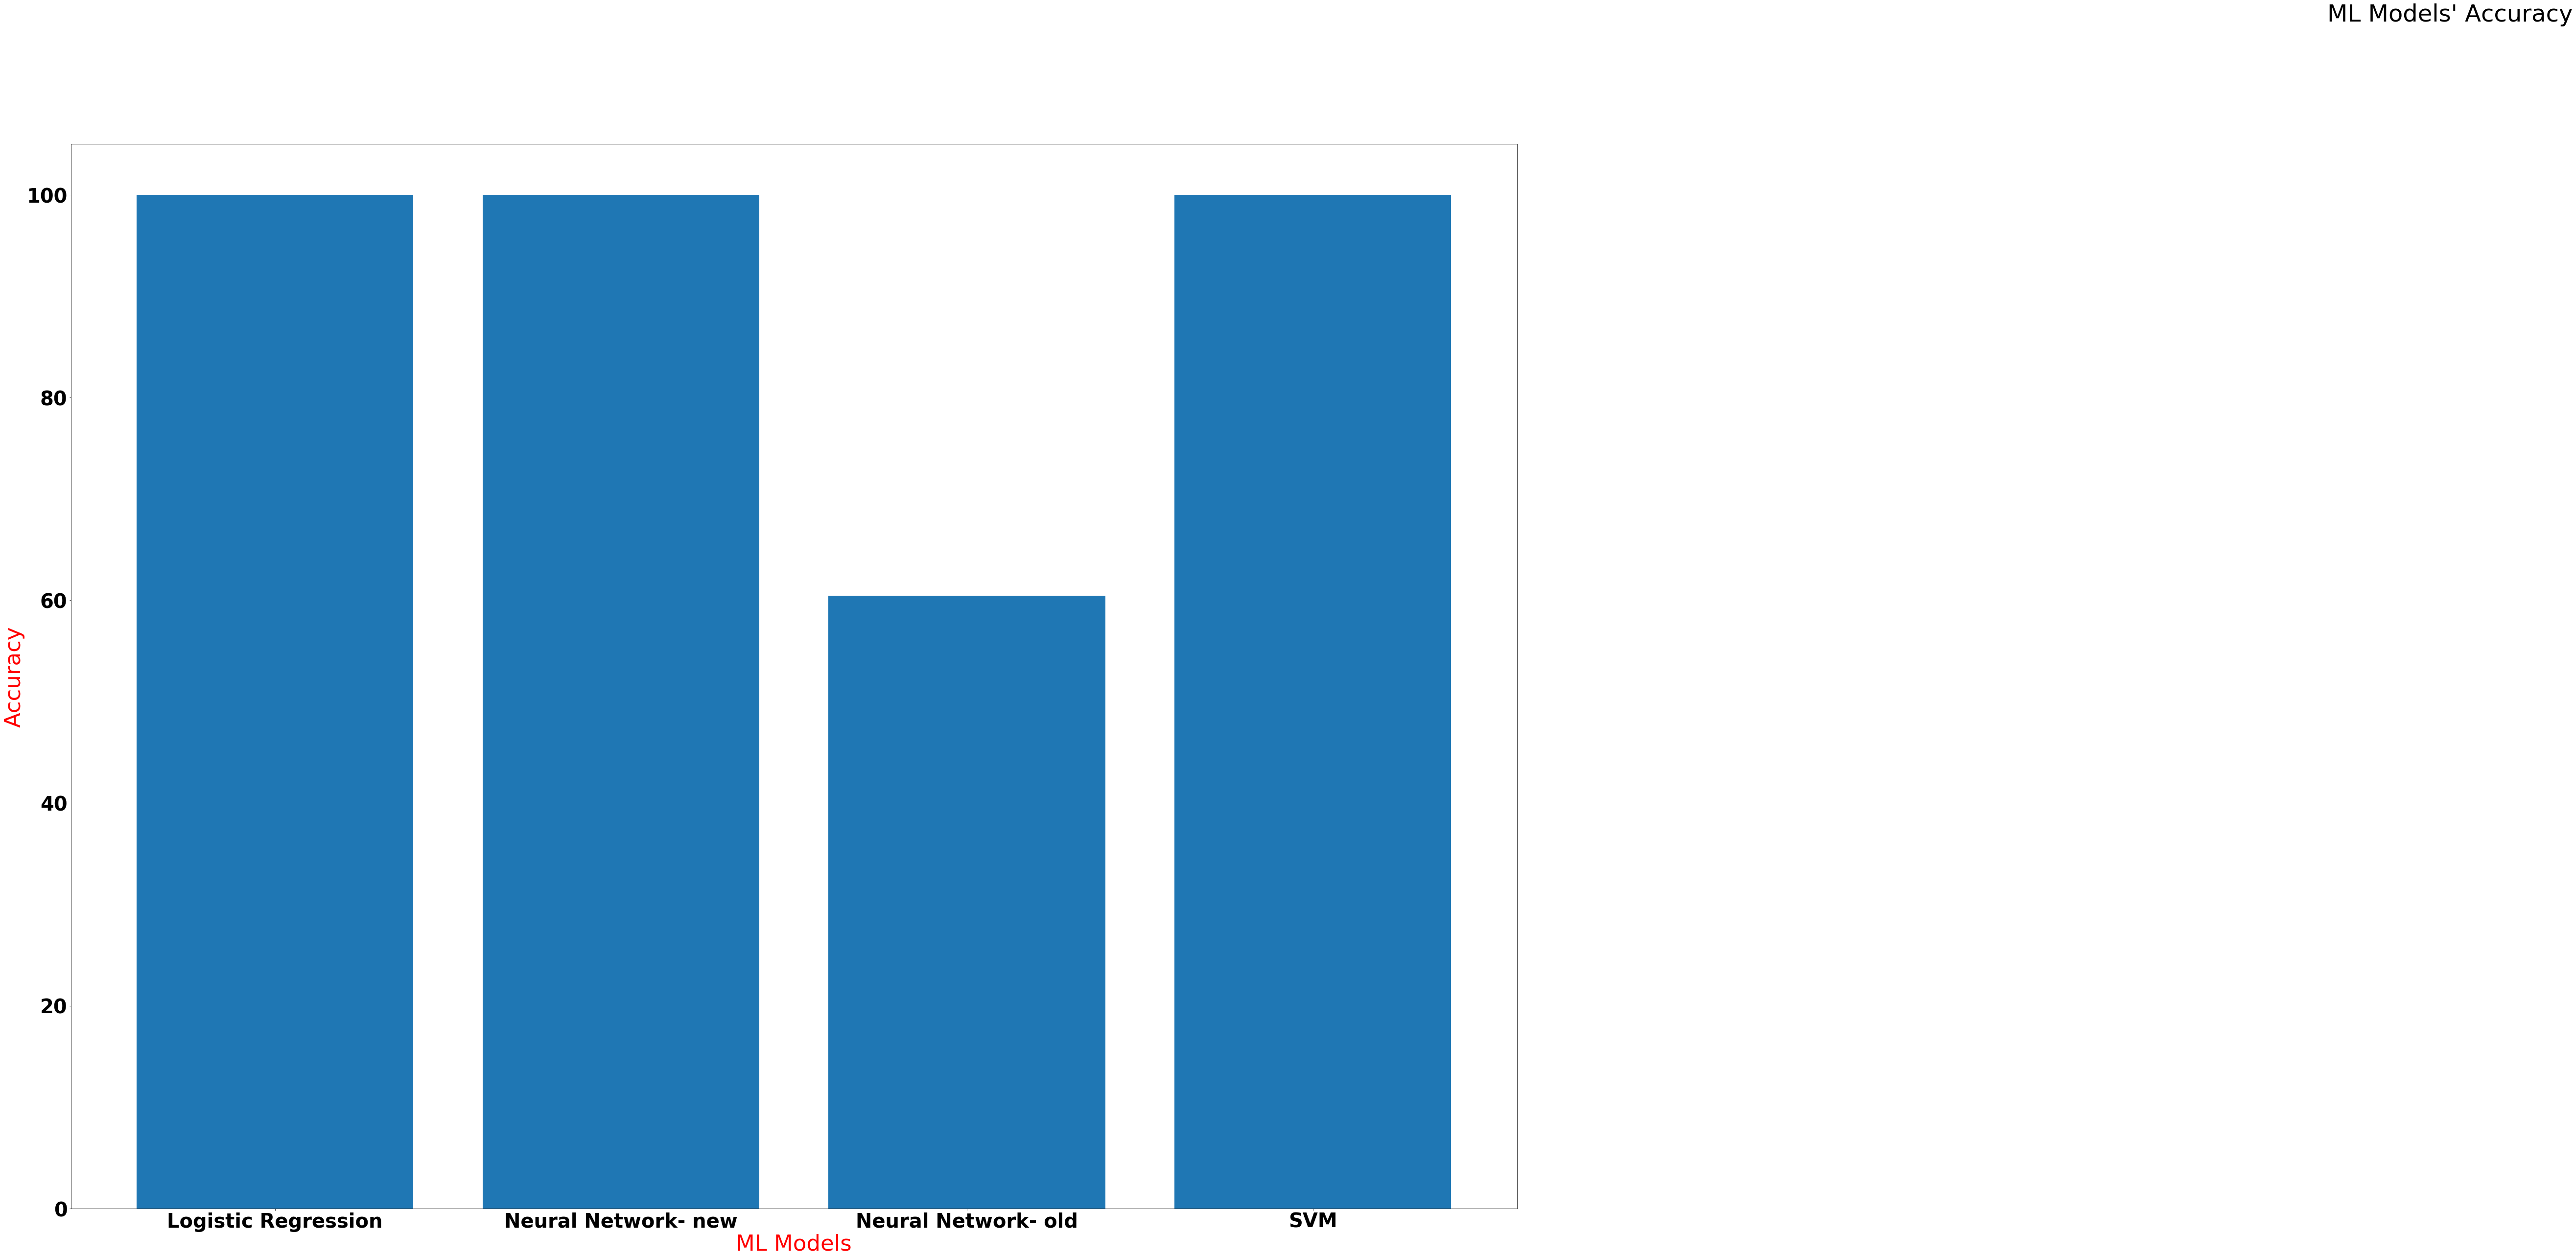

In [39]:
names = models_names
values = models_testing_accuracies

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 40}

plt.rc('font', **font)


plt.figure(figsize=(180, 40))

plt.subplot(131)
plt.bar(names, values)
plt.xlabel('ML Models', fontsize=45, color='red')
plt.ylabel('Accuracy', fontsize=45, color='red')

plt.suptitle("ML Models' Accuracy")
plt.show()

It seems that almost all models (except for the unoptimized version of ANN) are close when it comes to testing accuracy. Let's observe the building time a bit closer

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


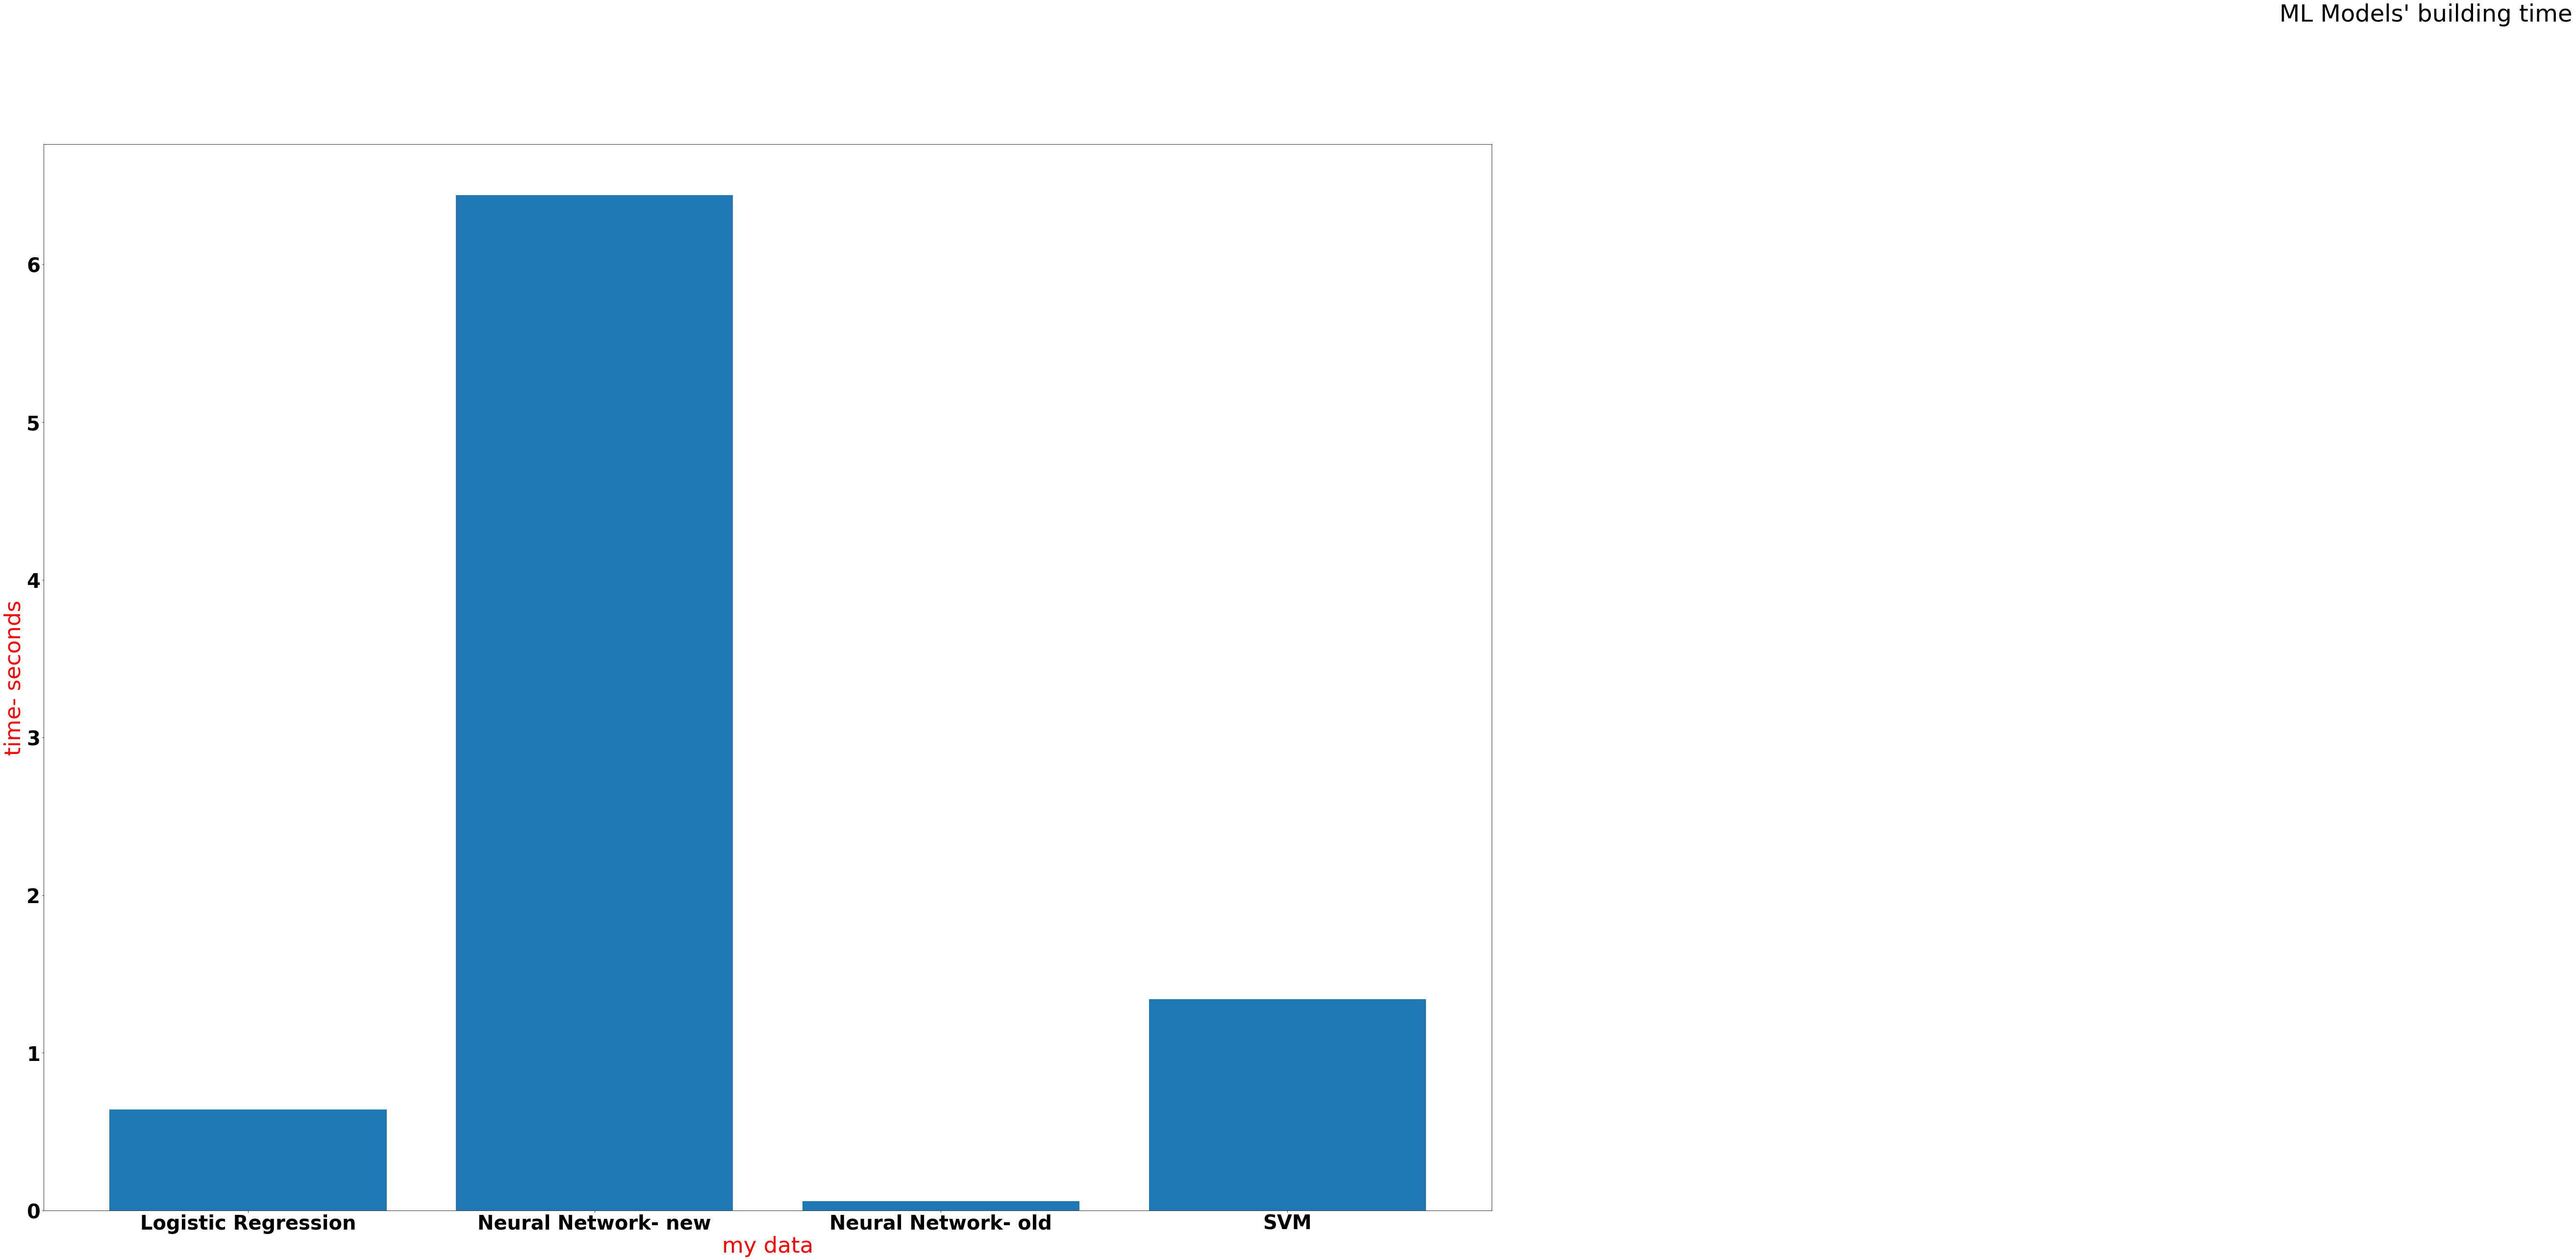

In [40]:
names = models_names
values = models_build_time

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 40}

plt.rc('font', **font)


plt.figure(figsize=(180, 40))

plt.subplot(131)
plt.bar(names, values)
plt.xlabel('my data', fontsize=45, color='red')
plt.ylabel('time- seconds', fontsize=45, color='red')

plt.suptitle("ML Models' building time")
plt.show()

We can conclude that even though we optimized the `neural network`, it's build time is exceptionally longer than `SVM` and `Logistic Regression`. This leaves that both `Logistic Regression` and `SVM` may be good candidates. 

# V. Conclusion 

In this section of the notebook, we close the discussion by mentioning some of the pitfalls we may encountered, and how to overcome them. Also, we provide some possible enhancements for both ML models, or ideas to imporve the idea behind the models, as well as a reflection and closing thoughts subsections

## V.I. Possible Pitfalls & how to Encounter them

Since the accuracy obtained from the `training set` is very high, we may face the problem of **overfitting** (i.e., when the model cannot generalize to the population, and almost 'memorizes' the training set). One possible way to encounter this is by using a `regularization term` which helps overcome this problem. Also, we can use `feature engineering` and its algorithms in order to optimize the set of features (i.e., predictors). However, since the problem is relatively simple, I think the produced models are good enough to serve the need

## V.II. Possible Enhacements 

Here's a list of to optimize the ML models produced: 
- We may use `Regularization Term` to overcome the problem of **overfitting**.
- We may use `Feature Engineering` to optimize the set of predictors.
- We may use `Ensemble Learning`, such as `bagging` to utilize more than learning algorithms. 

## V.III. Reflections 

To approach the problem of predicting whether the customer will only view or complete the offer, I used ML models as predicting tools. However, it preceeded this stage a lot of data cleaning and wrangling in order to get the datasets to a proper shape. I enjoyed working on this project (as with all the Nano Degree's projects). However, I found start working on it a bit confusing. The data was in a VERY BAD shape. Also, the fields weren't clear from the first glance. However, in the real world, such datasets are very common, and my job as a data scientist (and a software engineer :) ) to figure things out. Also, I found writing modular code very entertaining. Overall, I'm satisfied with this project. I didn't find any problems dealing with the ML models, since I have a decent experience on that matter. 

## V.IV. Closing Thoughts 

The project was very challenging for me, and I enjoyed working on it. I'm very to continue my journey in the Data Science career. I'd like to thank Udacity for this oppurtunity. 